<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-10-icici-stock-market-data-analysis?scriptVersionId=255384215" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stock Analysis of ICICI Ltd (2000–2021)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

-> To begin the analysis, we import the essential Python libraries:

**Pandas** for data manipulation and analysis.

**Numpy** for numerical operations.

**matplotlib.pyplot** for visualizing the data.

In [2]:
import matplotlib.pyplot as plt 


We begin by importing the historical stock price data for ICICI Bank and the metadata for all Nifty 50 stocks using read_csv and DataFrame methods from Pandas

In [3]:
icici_df=pd.read_csv('/kaggle/input/nifty50-stock-market-data/ICICIBANK.csv')
meta_df=pd.read_csv('/kaggle/input/nifty50-stock-market-data/stock_metadata.csv')
icici_df=pd.DataFrame(icici_df)
meta_df=pd.DataFrame(meta_df)

## DataCleaning

In [4]:
icici_df.shape

(5306, 15)

In [5]:
icici_df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     517
%Deliverble            517
dtype: int64

Trades: 2,850 missing values

Deliverable Volume: 517 missing values

%Deliverble: 517 missing values

**Filling Null Values with 0**

In [6]:
icici_df[['Trades', 'Deliverable Volume', '%Deliverble']] = icici_df[['Trades', 'Deliverable Volume', '%Deliverble']].fillna(0)
icici_df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

icici_df has no null values now 

Lets check for meta_df now

In [7]:
meta_df.isnull().sum()

Company Name    0
Industry        0
Symbol          0
Series          0
ISIN Code       0
dtype: int64

meta_df is already clean

In [8]:
meta_df

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018
5,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024
6,Bharti Airtel Ltd.,TELECOM,BHARTIARTL,EQ,INE397D01024
7,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011
8,Britannia Industries Ltd.,CONSUMER GOODS,BRITANNIA,EQ,INE216A01030
9,Cipla Ltd.,PHARMA,CIPLA,EQ,INE059A01026


In [9]:
icici_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,0.0,0.0,0.0000
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,0.0,0.0,0.0000
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,0.0,0.0,0.0000
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,0.0,0.0,0.0000
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ICICIBANK,EQ,569.95,602.00,605.50,588.00,588.70,591.10,596.22,62584522,3.731429e+15,546696.0,16913351.0,0.2702
5302,2021-04-27,ICICIBANK,EQ,591.10,593.25,601.95,591.10,599.00,598.75,597.63,24239685,1.448630e+15,233412.0,9056247.0,0.3736
5303,2021-04-28,ICICIBANK,EQ,598.75,598.00,622.80,598.00,619.70,621.35,612.57,33292864,2.039422e+15,295406.0,14011476.0,0.4209
5304,2021-04-29,ICICIBANK,EQ,621.35,622.55,628.45,609.00,621.00,621.45,619.55,34537860,2.139792e+15,304029.0,10324897.0,0.2989


**Lets merge both the data sets using merge (similar to left join) based on symbol Column**

In [10]:
icici_df['Symbol'] = 'ICICIBANK'
merged_df = icici_df.merge(meta_df, on='Symbol', how='left')


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series_x            5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              5306 non-null   float64
 13  Deliverable Volume  5306 non-null   float64
 14  %Deliverble         5306 non-null   float64
 15  Company Name        5306 non-null   object 
 16  Indust

**Daily Return %** how much the stock price changed during the day, from market open to market close, expressed as a percentage.

It helps identify whether a stock grew or declined in value within a trading day.

In [12]:
merged_df['Daily Return (%)'] = ((merged_df['Close'] - merged_df['Open']) / merged_df['Open']) * 100


**Price Range** is the difference between the highest and lowest prices of a stock within a single trading day.
It reflects the volatility of the stock on that day.

A larger range suggests more price fluctuation 

In [13]:
merged_df['Price Range'] = merged_df['High'] - merged_df['Low']


**#notes** : Volatility refers to the degree of variation in the price of a financial instrument—like a stock—over time. It is essentially a measure of how much the price fluctuates.
If a stock's price changes a lot in a short period (goes up and down frequently), it is said to be highly volatile.

If a stock's price stays relatively stable, it is low volatility.
High Volatility = High Risk
The stock might offer high returns, but also carries a greater chance of loss.

Low Volatility = Low Risk
Safer but usually with more modest returns.

**Volatility Calculation**
calculate daily volatility using the standard deviation of the stock’s High, Low, and Close prices for each trading day. This helps capture the intraday price fluctuations more comprehensively than just using the price range.

In [14]:
merged_df['Volatility'] = merged_df[['High', 'Low', 'Close']].std(axis=1)


CHANGING DATA TYPE OF DATE FOR ANALYSIS

In [15]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series_x            5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              5306 non-null   float64       
 13  Deliverable Volume  5306 non-null   float64     

In [17]:
merged_df.isnull().sum()

Date                  0
Symbol                0
Series_x              0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Company Name          0
Industry              0
Series_y              0
ISIN Code             0
Daily Return (%)      0
Price Range           0
Volatility            0
dtype: int64

In [18]:
merged_df

,Date,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,Series_y,ISIN Code,Daily Return (%),Price Range,Volatility
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,...,0.0,0.0,0.0000,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,0.537996,3.35,1.934123
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,...,0.0,0.0,0.0000,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,0.000000,7.50,3.876317
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,...,0.0,0.0,0.0000,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,-0.714286,6.00,3.055050
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,...,0.0,0.0,0.0000,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,-1.338028,4.45,2.437724
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,...,0.0,0.0,0.0000,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,-2.318841,6.50,3.421013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ICICIBANK,EQ,569.95,602.00,605.50,588.00,588.70,591.10,596.22,...,546696.0,16913351.0,0.2702,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,-1.810631,17.50,9.338273
5302,2021-04-27,ICICIBANK,EQ,591.10,593.25,601.95,591.10,599.00,598.75,597.63,...,233412.0,9056247.0,0.3736,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,0.927097,10.85,5.575019
5303,2021-04-28,ICICIBANK,EQ,598.75,598.00,622.80,598.00,619.70,621.35,612.57,...,295406.0,14011476.0,0.4209,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,3.904682,24.80,13.918603
5304,2021-04-29,ICICIBANK,EQ,621.35,622.55,628.45,609.00,621.00,621.45,619.55,...,304029.0,10324897.0,0.2989,ICICI Bank Ltd.,FINANCIAL SERVICES,EQ,INE090A01021,-0.176693,19.45,9.851438


## EDA


In [19]:
merged_df['Turnover']

0       2.095439e+12
1       2.173893e+12
2       1.612794e+12
3       1.982121e+12
4       9.538882e+11
            ...     
5301    3.731429e+15
5302    1.448630e+15
5303    2.039422e+15
5304    2.139792e+15
5305    1.435801e+15
Name: Turnover, Length: 5306, dtype: float64

# Descriptive Statistics

In [20]:
# Summary statistics for numeric columns
merged_df.describe()


,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Daily Return (%),Price Range,Volatility
count,5306,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,5306.000000,5.306000e+03,5306.000000,5306.000000,5306.000000,5306.000000
mean,2010-08-18 21:26:56.132679936,550.895392,551.558538,560.558556,541.534197,551.050980,550.995524,551.129031,8.224631e+06,3.759336e+14,64046.530908,3.775788e+06,0.427330,-0.101523,19.024359,10.002320
min,2000-01-03 00:00:00,67.400000,67.000000,70.450000,66.000000,67.000000,67.400000,68.520000,7.409000e+03,9.617283e+10,0.000000,0.000000e+00,0.000000,-15.136364,0.000000,0.000000
25%,2005-04-13 12:00:00,267.562500,267.400000,271.912500,263.625000,267.400000,267.612500,267.577500,9.612055e+05,3.459444e+13,0.000000,4.218848e+05,0.341225,-1.414666,6.950000,3.607486
50%,2010-08-17 12:00:00,398.075000,399.000000,406.525000,392.450000,398.700000,398.175000,398.235000,3.486648e+06,2.923010e+14,0.000000,1.618184e+06,0.458700,-0.164214,13.600000,7.087871
75%,2015-12-17 18:00:00,873.562500,877.000000,888.775000,859.800000,874.600000,873.562500,873.510000,1.157202e+07,4.993528e+14,104406.750000,5.197958e+06,0.552175,1.125084,25.350000,13.292880
max,2021-04-30 00:00:00,1794.100000,1767.050000,1798.150000,1760.150000,1793.000000,1794.100000,1783.460000,2.868577e+08,1.461959e+16,949891.000000,2.325307e+08,0.983000,25.242260,233.250000,126.157610
std,NaN,368.784064,368.890953,374.079697,363.389664,368.705647,368.725374,368.746905,1.218535e+07,4.759238e+14,96422.631274,6.173229e+06,0.187946,2.643118,17.788586,9.428916


The dataset covers 5,306 trading days of ICICI Bank, with stock prices ranging from ₹67.40 to ₹1,794.10.

On average, the daily return is approximately -0.10%, with a price range of ₹19.02 and volatility of ₹10.00.

Volume traded varies significantly, from as low as 7,409 shares to over 286 million, indicating periods of both low and high market activity.


**Date Range in the Dataset**

In [21]:
min_date = merged_df['Date'].min()
max_date = merged_df['Date'].max()

print(" Date Range in the Dataset:")
print(f"Start Date: {min_date}")
print(f"End Date:   {max_date}")

 Date Range in the Dataset:
Start Date: 2000-01-03 00:00:00
End Date:   2021-04-30 00:00:00


In [22]:
# Mean closing price
mean_close = merged_df['Close'].mean()
print(mean_close)
# Total volume traded
total_volume = merged_df['Volume'].sum()
print(total_volume)

# Price range
min_price = merged_df['Low'].min()
max_price = merged_df['High'].max()

price_range = max_price - min_price
print(min_price)
print(max_price)
print(price_range)


550.9955239351677
43639890550
66.0
1798.15
1732.15


*Mean Closing Price:** ₹550.99  
-  **Total Volume Traded:** 43,639,890,550 shares  
-  **Price Range:**  
  - **Lowest Price:** ₹66.00  
  - **Highest Price:** ₹1798.15  
  - **Overall Range:** ₹1732.15  

**Distribution of Closing Prices**

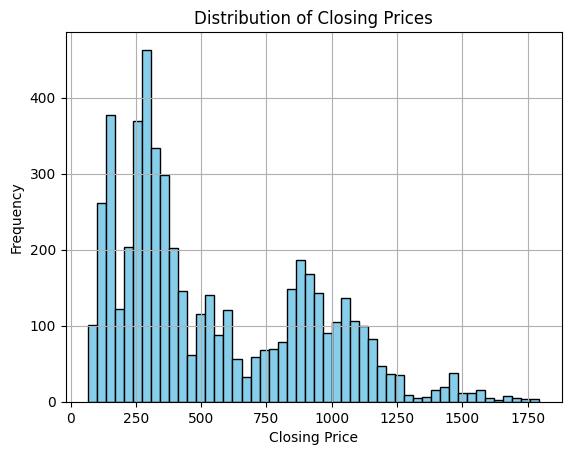

In [23]:
import matplotlib.pyplot as plt

plt.hist(merged_df['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- The histogram shows the frequency distribution of ICICI Bank's closing stock prices.
- Most closing prices are concentrated between ₹200 and ₹500.
- The distribution is right-skewed, indicating a gradual increase in stock value over time with fewer high-price days.

**Distribution of Volume Traded**

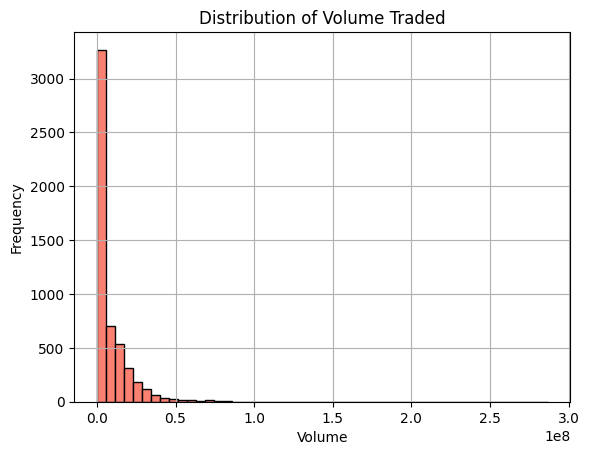

In [24]:
plt.hist(merged_df['Volume'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Volume Traded')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram displays how often different volumes of ICICI Bank stock were traded.
- Most trading volumes fall below 2 crore (20 million) shares per day.
- The distribution is highly right-skewed, suggesting that high-volume trading days are rare.

**ICICI Bank Closing Stock Price Over Time (2000–2021)**

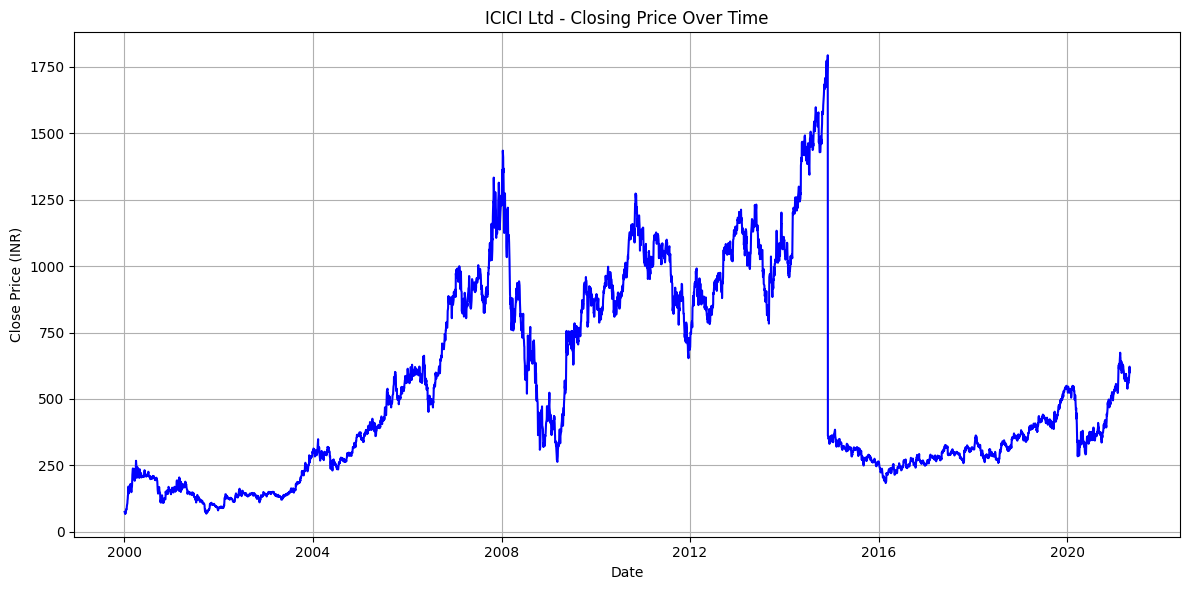

In [25]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Close'], color='blue')
plt.title('ICICI Ltd - Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


This line chart visualizes the closing price trend of ICICI Bank over two decades. Key observations include:

A steady rise from 2003 to 2008, peaking before the global financial crisis.

A sharp dip around 2008–2009, followed by multiple recovery phases.

A sudden drop in 2015–2016, possibly due to corporate or market-specific events.

Gradual upward trend post-2016, showing signs of recovery and stability.

**Distribution of Daily Returns (%) – ICICI Ltd**

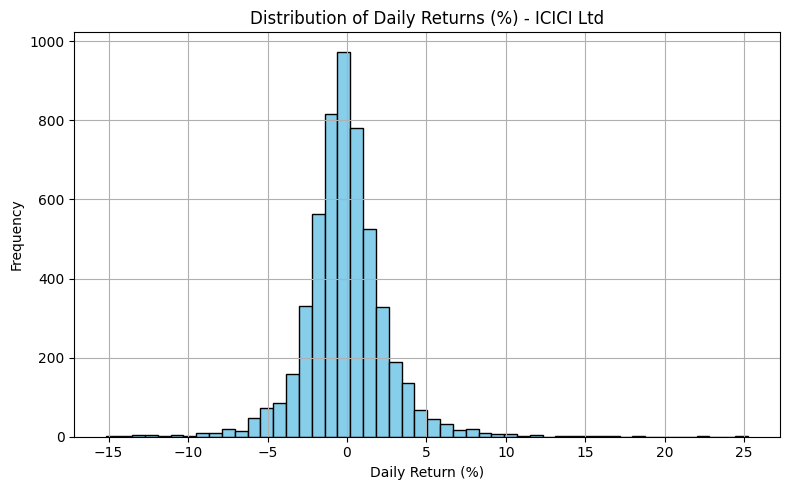

In [26]:
plt.figure(figsize=(8,5))
plt.hist(merged_df['Daily Return (%)'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Returns (%) - ICICI Ltd')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


This histogram illustrates the daily percentage returns of ICICI Bank stock over time. Key insights include:

Most daily returns are clustered around 0%, indicating small day-to-day changes.

The distribution is bell-shaped and symmetric, suggesting a normal return pattern.

Outliers are visible on both ends, with a few extreme positive and negative return days.

This type of chart helps in understanding volatility — how “risky” or “stable” the stock is on a daily basis.

**"ICICI Ltd - Trading Volume Over Time"**

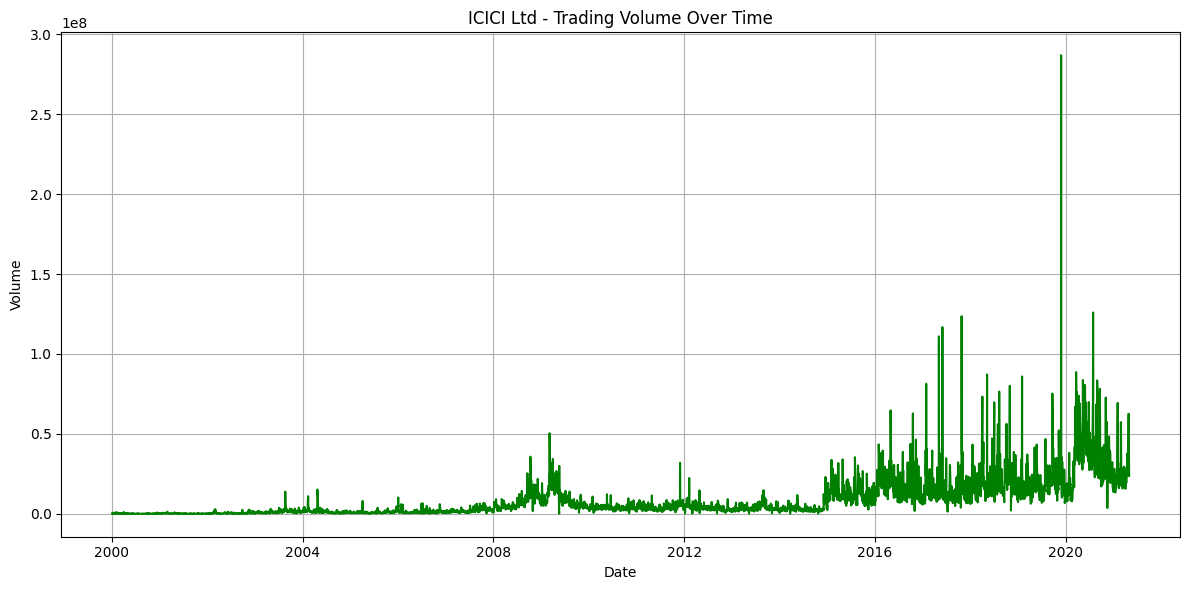

In [27]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Volume'], color='green')
plt.title('ICICI Ltd - Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


ICICI saw relatively low trading activity in its early years.

Significant volume increases around 2008 (global financial crisis) and 2020 (pandemic-driven market volatility).

A massive peak around 2020, indicating extraordinary trading activity, likely due to market reactions to COVID-19 or related news.

Over the two decades, trading volume has generally increased, showing growing interest and liquidity in the stock.

**what is the highest and lowest CLose Price for ICICI**

In [28]:
highest_close = merged_df['Close'].max()
lowest_close = merged_df['Close'].min()
print(f"Highest Close Price: ₹{highest_close:.2f}")
print(f"Lowest Close Price: ₹{lowest_close:.2f}")


Highest Close Price: ₹1794.10
Lowest Close Price: ₹67.40


**How many trading days did ICICI Ltd experience extreme price movements (greater than ±10% daily returns)**

In [29]:
huge_gains = merged_df[merged_df['Daily Return (%)'] > 10]
huge_losses = merged_df[merged_df['Daily Return (%)'] < -10]

print(f"Days with >10% Gain: {len(huge_gains)}")
print(f"Days with >10% Loss: {len(huge_losses)}")


Days with >10% Gain: 23
Days with >10% Loss: 21


**ICICI Ltd - Close Price vs 30-Day Moving Average**

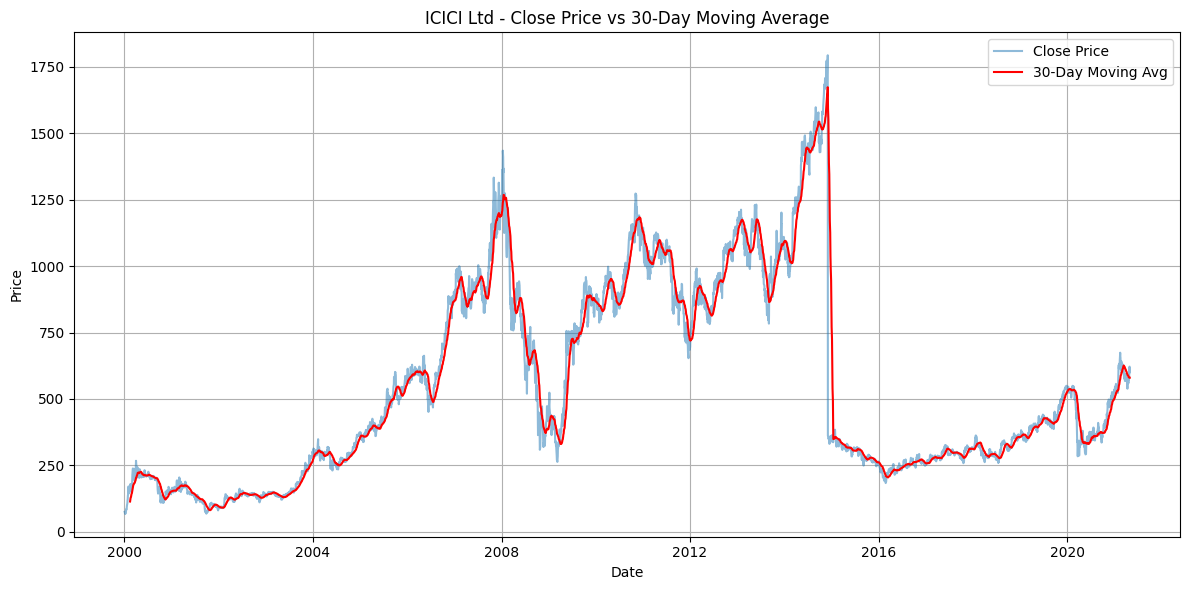

In [30]:
merged_df['MA_30'] = merged_df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Close'], label='Close Price', alpha=0.5)
plt.plot(merged_df['Date'], merged_df['MA_30'], label='30-Day Moving Avg', color='red')
plt.title('ICICI Ltd - Close Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Blue line (Close Price): The actual daily closing price of ICICI Ltd.

Red line (30-Day Moving Avg): The average of the past 30 days of closing prices, recalculated daily. This smooths out short-term fluctuations and helps identify trends.

When the price crosses above the moving average, it can indicate bullish momentum; below it can signal bearish sentiment.

In high volatility periods (e.g. 2008 crash or 2015–16 spike and drop), the blue line fluctuates more significantly around the red line.

In [31]:
merged_df['Year'] = merged_df['Date'].dt.year

**Yearly Volatility of ICICI Ltd (2000–2021)**

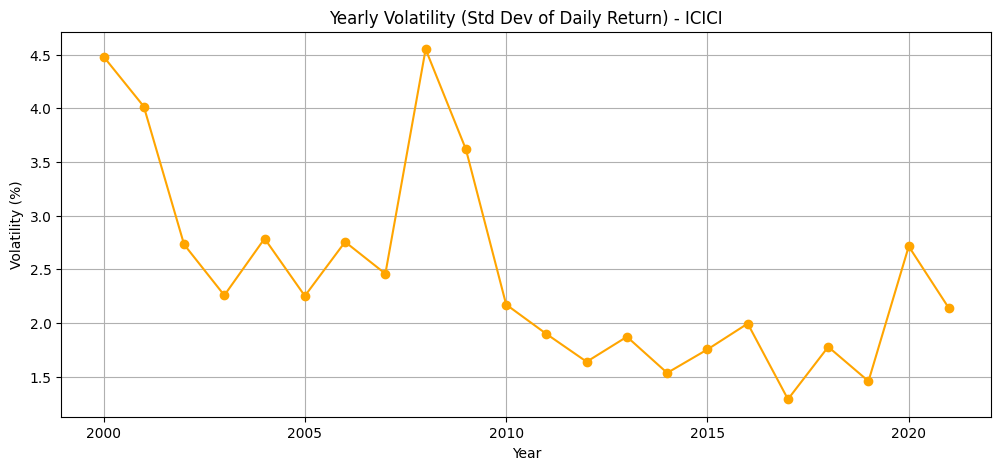

In [32]:
yearly_volatility = merged_df.groupby('Year')['Daily Return (%)'].std()

plt.figure(figsize=(12, 5))
plt.plot(yearly_volatility, marker='o', color='orange')
plt.title('Yearly Volatility (Std Dev of Daily Return) - ICICI')
plt.xlabel('Year')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.show()


This line plot shows the annual volatility of ICICI Ltd's stock.

Volatility is measured as the standard deviation of daily returns for each year.

Higher volatility indicates more fluctuation in daily prices and thus higher risk.

Noticeable peaks in 2000, 2008, and 2020 reflect periods of market uncertainty or crises:

 2008 – Global financial crisis.

2020 – COVID-19 pandemic impact.

**Average Closing Price by Year – ICICI Ltd**

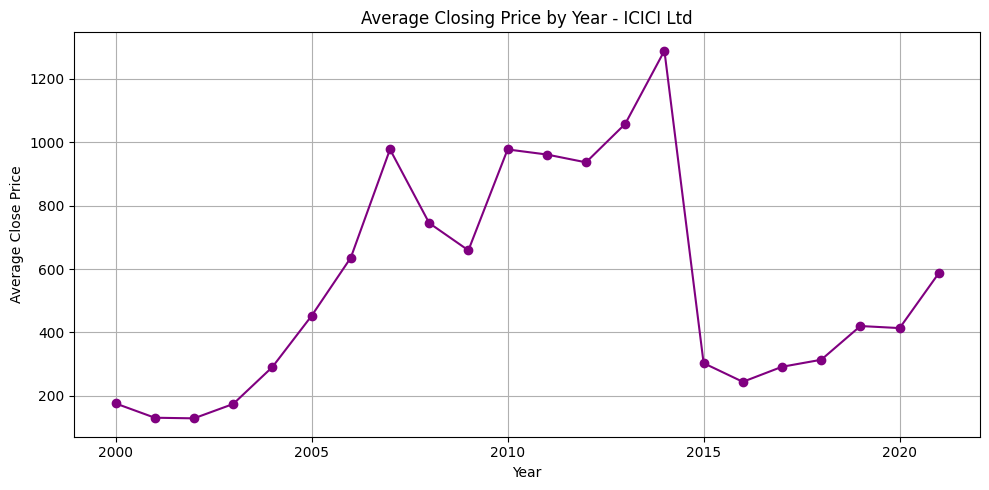

In [33]:
avg_close_by_year = merged_df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10,5))
avg_close_by_year.plot(marker='o', linestyle='-', color='purple')
plt.title('Average Closing Price by Year - ICICI Ltd')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


From 2004 to 2008, the stock experienced strong growth.
-  The average close peaked around 2014, indicating a strong bullish phase.
- In 2015, there was a sharp fall, potentially due to economic or company-specific downturns.
- Post-2016, the stock began a slow recovery, stabilizing but not surpassing the previous highs.


**What is the Average Daily Turnover for ICICI**

In [34]:
average_turnover = merged_df['Turnover'].mean()
print(f"Average Daily Turnover for ICICI: ₹{average_turnover:.2f} ")


Average Daily Turnover for ICICI: ₹375933606462466.12 


**What is the Highest Turnover**

In [35]:
highest_turnover_row = merged_df.loc[merged_df['Turnover'].idxmax()]
print(highest_turnover_row[['Date', 'Turnover', 'Close']])


Date        2019-11-26 00:00:00
Turnover    14619589179685000.0
Close                     510.7
Name: 4949, dtype: object


**Average Yearly Price Range – ICICI**

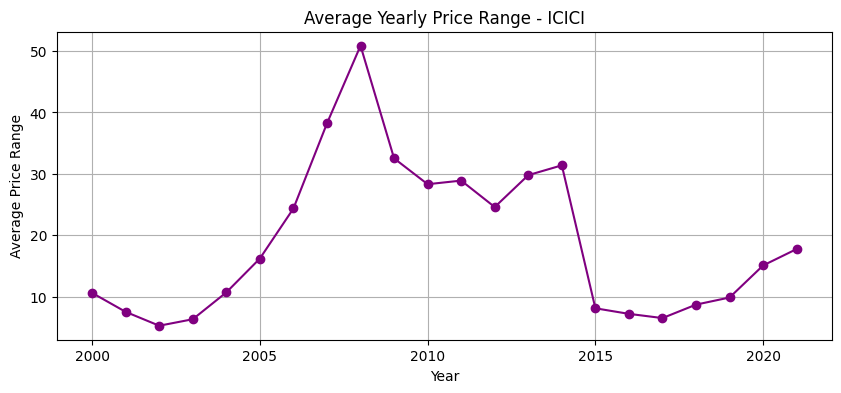

In [36]:
avg_price_range = merged_df.groupby('Year')['Price Range'].mean()

plt.figure(figsize=(10, 4))
plt.plot(avg_price_range, marker='o', color='purple')
plt.title('Average Yearly Price Range - ICICI')
plt.xlabel('Year')
plt.ylabel('Average Price Range')
plt.grid(True)
plt.show()


This chart displays the average of daily price ranges (`High - Low`) for each year.
- The **highest average price range** occurred in **2008**, suggesting **increased volatility** during that time.
- From **2015 onwards**, the price range has remained relatively **stable and lower**, indicating calmer market behavior for ICICI.

> **Insight:** A larger price range implies greater intraday movement and volatility; smaller range implies more stability in daily price behavior.

In [37]:
correlation = merged_df['Volatility'].corr(merged_df['Daily Return (%)'])
print(f"Correlation between Volatility and Daily Return (%): {correlation:.2f}")


Correlation between Volatility and Daily Return (%): 0.02


he correlation value is **0.02**, indicating **almost no linear relationship**.
- This implies that **years with high volatility did not consistently result in high or low average daily returns**.

**Average Trading Volume per Year – ICICI Ltd**

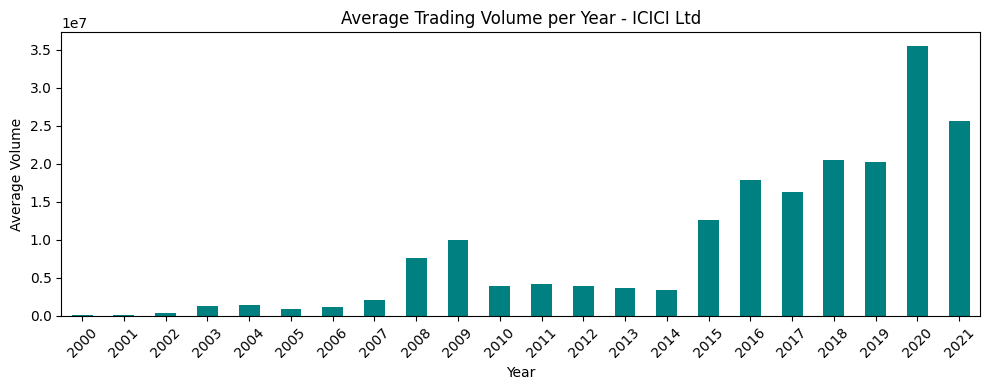

In [38]:
merged_df['Year'] = merged_df['Date'].dt.year
avg_volume_per_year = merged_df.groupby('Year')['Volume'].mean()

avg_volume_per_year.plot(kind='bar', figsize=(10, 4), color='teal')
plt.title("Average Trading Volume per Year - ICICI Ltd")
plt.ylabel("Average Volume")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The chart shows the **mean number of shares traded per day**, averaged across each year.
- A significant **rise in trading activity** is visible post-2014.
- **2019 recorded the highest average trading volume**, reflecting increased market interest or events around that time.
- Earlier years had relatively **low trading volumes**, possibly due to lower market participation or less investor focus on ICICI.

# Summary 

ICICI's average closing price peaked around 2014 and then dropped sharply.

Yearly volatility was highest in 2000 and 2009, showing more uncertainty in those years.

There were 23 days with over 10% gain and 21 days with over 10% loss.

The average daily return shows small fluctuations with low correlation to volatility.

The highest turnover occurred on 26-Nov-2019, indicating strong market activity.

The average yearly price range was widest in 2008, showing high price movement.

Average trading volume has increased significantly since 2014, peaking in 2019.

ICICI’s consistent trading activity, declining volatility, and recovering prices suggest improving market confidence. The increased average volume in recent years reflects strong investor participation.

**Based on the data, ICICI appears to be a stable and actively traded stock. With rising volumes and moderate volatility, it may be a reasonable buy for medium to long-term investors. However, always consider broader market conditions and your risk profile.**